# 1. Importing Visualization Libraries and Data

In [1]:
# Importing Visualization Libraries and Data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# create path
path = r'C:\Users\supri\Desktop\Supriya\DataAnalysis\Project\Data Immersion\Achievement 1-2\Boat_Sales'

In [3]:
# import boat_data_cleaned.csv
df_boat_data_cleaned = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_cleaned.csv'), index_col=[0])

In [4]:
#Check output
df_boat_data_cleaned.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR Price,Country1,City1
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226,3403.74,Switzerland,Lake Geneva
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.00,Germany,BÃ¶nningstedt
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64,3367.00,Denmark,Svendborg
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.00,Germany,Bayern
6,Catamaran,NaN,"Used boat,Unleaded",1999,6.20,2.38,Aluminium,474,3672.00,Switzerland,Neuenburgersee


In [5]:
#Check for mixed datatypes
for col in df_boat_data_cleaned.columns.tolist():
      weird = (df_boat_data_cleaned[[col]].map(type) != df_boat_data_cleaned[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_boat_data_cleaned[weird]) > 0:
        print (col)

Manufacturer
Type
Material


In [6]:
#Check the datatypes 
df_boat_data_cleaned.dtypes

Boat Type                       object
Manufacturer                    object
Type                            object
Year Built                       int64
Length                         float64
Width                          float64
Material                        object
Number of views last 7 days      int64
EUR Price                      float64
Country1                        object
City1                           object
dtype: object

In [7]:
# Convert columns to string while handling NaNs
df_boat_data_cleaned['Manufacturer'] = df_boat_data_cleaned['Manufacturer'].astype(str).replace("nan", pd.NA)
df_boat_data_cleaned['Type'] = df_boat_data_cleaned['Type'].astype(str).replace("nan", pd.NA)
df_boat_data_cleaned['Material'] = df_boat_data_cleaned['Material'].astype(str).replace("nan", pd.NA)

In [8]:
## drop the other missing values
df_boat_data_cleanedup = df_boat_data_cleaned.dropna()

In [9]:
# check the shape dataframe
df_boat_data_cleanedup.shape

(6636, 11)

In [10]:
#Check for mixed datatypes
for col in df_boat_data_cleanedup.columns.tolist():
      weird = (df_boat_data_cleanedup[[col]].map(type) != df_boat_data_cleanedup[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_boat_data_cleanedup[weird]) > 0:
        print (col)
        

In [11]:
#Seperating the fuel type from Type column
#Set -fuel type
fuel_types = ['Diesel', 'Electric', 'Unleaded', 'Gas', 'Hybrid', 'Propane','Display Model', ]
#helper function to return the fuel type 
def fuel_split(type_and_fuel):
    parts = type_and_fuel.split(',')
    for item in parts:
        if item in fuel_types:
            return item
    return None

In [12]:
# create new Type_split column with only the boat type checking whether it is not a fuel type
df_boat_data_cleanedup.loc[:, 'Type_split'] = df_boat_data_cleanedup['Type'].apply(
    lambda x: x.split(',')[0] if x.split(',')[0] not in fuel_types else None
)

#create new Fuel column fith fuel type
df_boat_data_cleanedup.loc[:, 'Fuel'] = df_boat_data_cleanedup.apply(
    lambda row: fuel_split(row['Type']), axis=1
)

C:\Users\supri\AppData\Local\Temp\ipykernel_47364\3394346957.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boat_data_cleanedup.loc[:, 'Type_split'] = df_boat_data_cleanedup['Type'].apply(
C:\Users\supri\AppData\Local\Temp\ipykernel_47364\3394346957.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boat_data_cleanedup.loc[:, 'Fuel'] = df_boat_data_cleanedup.apply(


In [13]:
#Check the df
df_boat_data_cleanedup.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,EUR Price,Country1,City1,Type_split,Fuel
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,3490.0,Germany,BÃ¶nningstedt,new boat from stock,None
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,3399.0,Germany,Bayern,new boat from stock,None
10,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,3570.0,Switzerland,Seengen,Used boat,Electric
12,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,3500.0,Italy,Lake Garda,Used boat,None
13,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,4692.0,Switzerland,Zugersee,new boat from stock,None


# Correlations

In [14]:
#Checking the columns for the df
df_boat_data_cleanedup.columns

Index(['Boat Type', 'Manufacturer', 'Type', 'Year Built', 'Length', 'Width',
       'Material', 'Number of views last 7 days', 'EUR Price', 'Country1',
       'City1', 'Type_split', 'Fuel'],
      dtype='object')

In [15]:
# Creating subset excluding categorical variables 
sub = df_boat_data_cleanedup[['Year Built', 'Length', 'Width', 'Number of views last 7 days', 'EUR Price']]

In [16]:
#Check output
sub

,Year Built,Length,Width,Number of views last 7 days,EUR Price
1,2020,4.00,1.50,75,3490.00
4,2019,3.55,1.46,58,3399.00
10,1987,4.35,1.75,239,3570.00
12,2004,4.70,2.00,69,3500.00
13,2020,4.40,1.65,113,4692.00
...,...,...,...,...,...
9877,1974,7.20,2.70,1299,5100.00
9878,1980,6.00,2.10,1917,5098.98
9882,1984,6.00,1.62,288,5049.00
9885,2020,4.40,1.80,354,4499.00


In [17]:
# Create a correlation matrix using pandas
sub.corr(method='pearson')

,Year Built,Length,Width,Number of views last 7 days,EUR Price
Year Built,1.000000,-0.092714,-0.083579,-0.193779,0.121652
Length,-0.092714,1.000000,0.922321,-0.169383,0.650364
Width,-0.083579,0.922321,1.000000,-0.185441,0.566597
Number of views last 7 days,-0.193779,-0.169383,-0.185441,1.000000,-0.046160
EUR Price,0.121652,0.650364,0.566597,-0.046160,1.000000


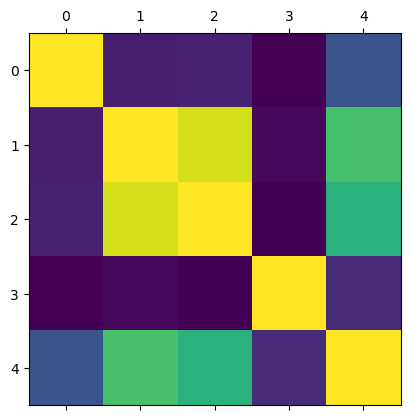

In [18]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

In [19]:
#current dir
cwd = os.getcwd()
cwd

'C:\\Users\\supri\\Desktop\\Supriya\\DataAnalysis\\Project\\Data Immersion\\Achievement 1-2\\Boat_Sales\\03 Scripts'

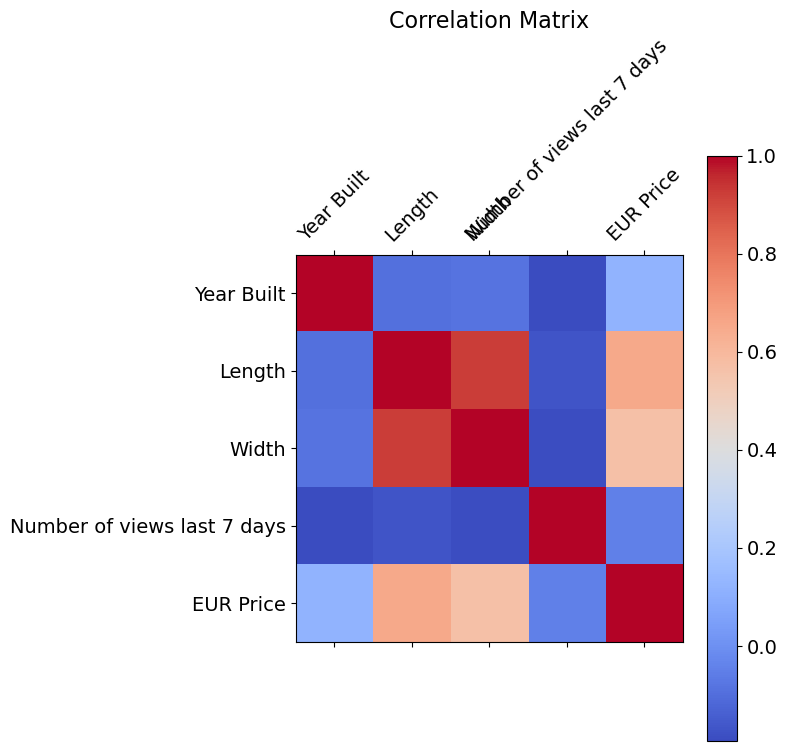

In [20]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8))
corr_matrix = sub.corr()
ax = f.add_subplot(111)
cax = ax.matshow(corr_matrix, cmap='coolwarm')

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, fontsize=14)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns, fontsize=14)

cb = f.colorbar(cax)
cb.ax.tick_params(labelsize=14)

plt.title('Correlation Matrix', fontsize=16)
plt.tight_layout()
plt.show()

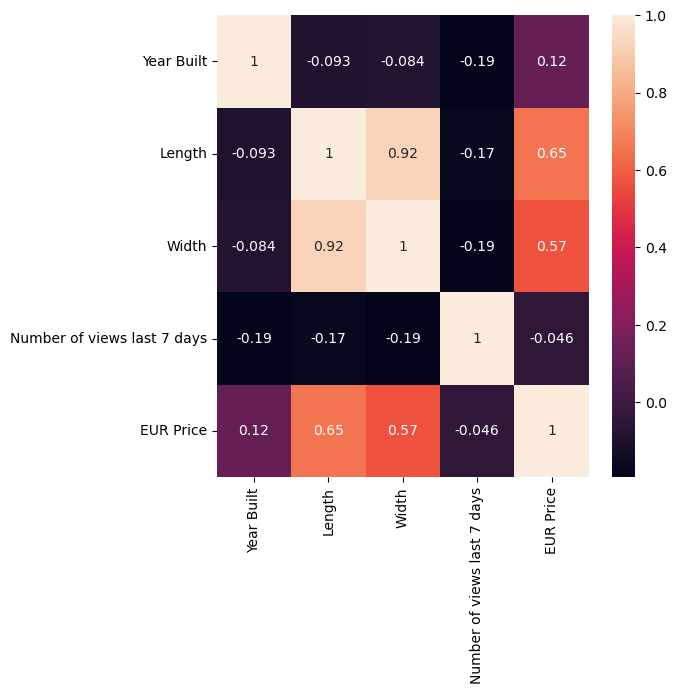

In [21]:
# creating subplot with matplotlib
f,ax = plt.subplots(figsize=(6,6))

# corelation heatmap in seaborn
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)
#place the correlation coefficients onto the heatmap.

In [22]:
# Exporting the image
corr.figure.savefig(os.path.join(path,  '04 Analysis','Visualizations', 'corelation_heatmap.png'))

#### ObservationBoat length and width are strongly related, with a high correlation of 0.92, which makes sense because bigger boats usually get both longer and wider. But when looking at how these factors relate to the price in Europe, the length has a moderate correlation of 0.63 and the width slightly less at 0.54. Interestingly, as the number of views goes up, the price tends to go down, showing a negative relationship. Aside from length and width, no other factors show a strong link with each other.

## Scatterplot

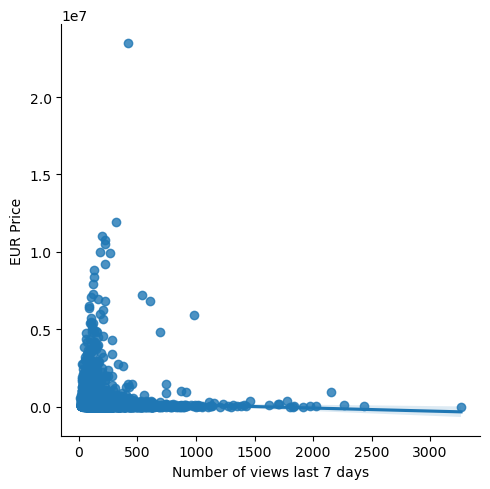

In [23]:
# Scatterplot for the "Number of views last 7 days" and the "EUR_price"
scatterplot1=sns.lmplot(x='Number of views last 7 days', y ='EUR Price', data = df_boat_data_cleanedup)

#### Observation -Boat listings priced under 500,000 euros attract the most attention, with one boat under 200,000 euros receiving over 3,000 views. This suggests that many viewers are interested in boats around the 300,000 euro range. On the other hand, a luxury boat priced at over 20 million euros still managed to get 500 views in just a week, likely driven by curiosity or interest in seeing the most expensive option available.

In [24]:
# Exporting 
scatterplot1.fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Scatterplot Views and Price.png'))

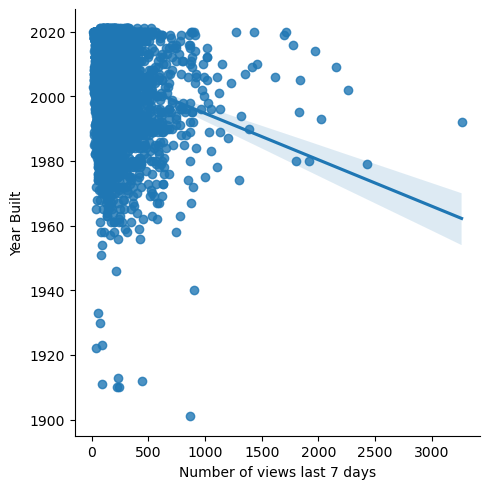

In [25]:
# Scatterplot for the "Number of views last 7 days" and the "Year Built"
scatterplot2=sns.lmplot(x='Number of views last 7 days', y ='Year Built', data = df_boat_data_cleanedup)

#### Observation -There is a concentration of boats manufacturered between the years 1960 and 2020. There is a downward trend showing that people are favoring older models. This could be due to prices or other factors.

In [26]:
# Exporting 
scatterplot2.fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Scatterplot Views and YearBuilt.png'))

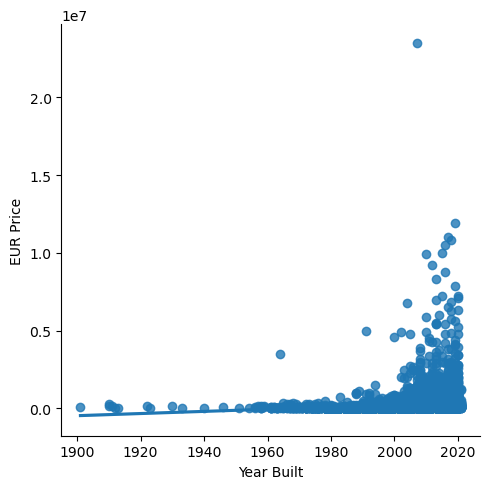

In [27]:
# Scatterplot for the "Year Built" and the "EUR Price"
scatterplot3=sns.lmplot(x='Year Built', y ='EUR Price', data = df_boat_data_cleanedup)

#### Observation - Newer boats (especially post-2000) tend to have higher prices.However, there's also a cluster of older boats with high prices, possibly classics or luxury yachts.

In [28]:
# Exporting 
scatterplot3.fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Scatterplot Price and YearBuilt.png'))

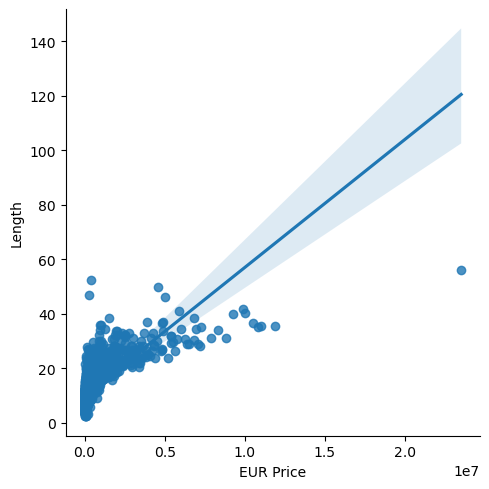

In [29]:
# Create a scatterplot for the "Price" and "Length" columns in seaborn

scatterplot4=sns.lmplot(x = 'EUR Price', y = 'Length', data = df_boat_data_cleanedup)

#### Observation -Good for checking if longer boats are generally more expensive.The longer the boat, the more expensive it is.

In [30]:
# Exporting 
scatterplot4.fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Scatterplot Price and Length.png'))

## Pair plots

In [31]:
sub.columns

Index(['Year Built', 'Length', 'Width', 'Number of views last 7 days',
       'EUR Price'],
      dtype='object')

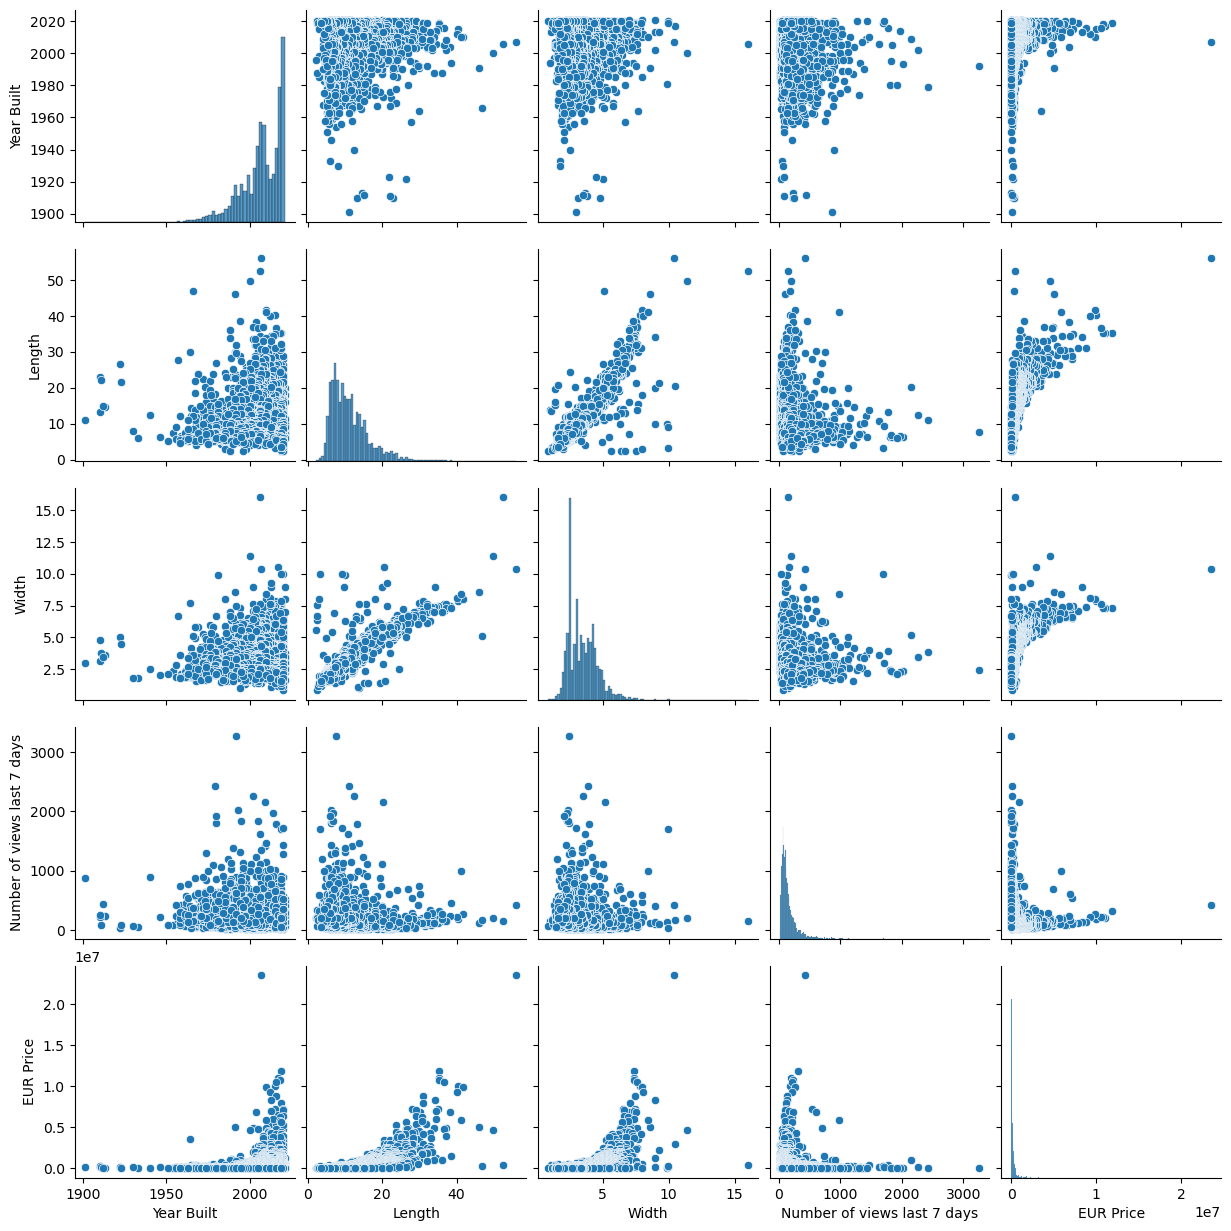

In [32]:
# Create a pair plot 

g = sns.pairplot(sub)

In [33]:
# Exporting 
g.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Pair plots.png'))

#### Observation -There is a positive correlation: longer boats tend to be more expensive.There is a positive correlation: longer boats tend to be more expensive.Newer boats (especially post-2000) tend to have higher prices.However, there's also a cluster of older boats with high prices, possibly classics or luxury yachts.A lot of cheaper boats (<1 million EUR) get many views.Very expensive boats don’t necessarily get the most attention — suggesting buyers are browsing within budget.Views seem concentrated on newer boats, though there's some interest across all years.Possibly reflects buyer preference for newer models or curiosity.

## Categorical Plots:

##### Creating a categorical variable that splits the "Price per Unit" column into categories

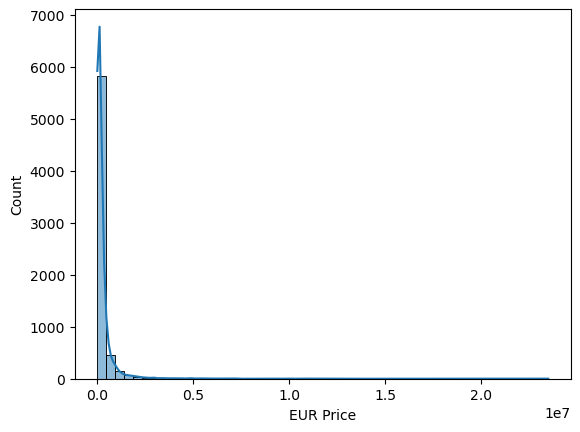

In [36]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

hist1 =sns.histplot(df_boat_data_cleanedup['EUR Price'], bins = 50, kde = True)

In [38]:
# Creating price categories
df_boat_data_cleanedup.loc[df_boat_data_cleanedup['EUR Price'] < 50000, 'Price_Category'] = 'Low-priced'
df_boat_data_cleanedup.loc[(df_boat_data_cleanedup['EUR Price'] >= 50000) & (df_boat_data_cleanedup['EUR Price'] <= 100000), 'Price_Category'] = 'Mid-priced'
df_boat_data_cleanedup.loc[df_boat_data_cleanedup['EUR Price'] > 100000, 'Price_Category'] = 'High-priced'

In [39]:
#Check the frequency counts
df_boat_data_cleanedup['Price_Category'].value_counts(dropna=False)

Price_Category
High-priced    3144
Low-priced     1926
Mid-priced     1566
Name: count, dtype: int64

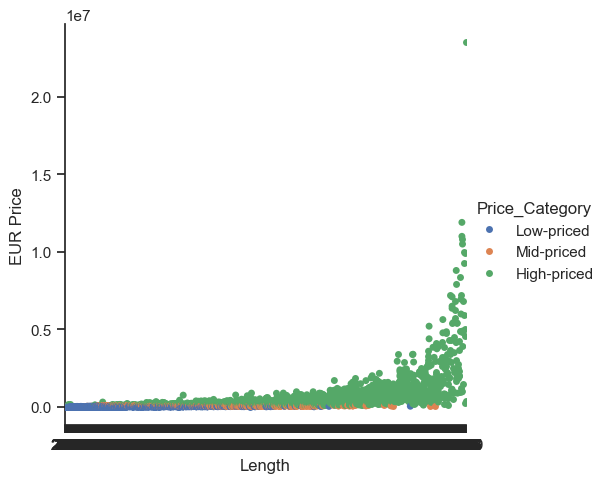

In [41]:
# Create a categorical plot in seaborn using the price categories created above
# Set the style
sns.set(style='ticks')

# Create a categorical plot to show the relationship between boat length and price
g1 = sns.catplot(x='Length', y='EUR Price', hue='Price_Category', data=df_boat_data_cleanedup)

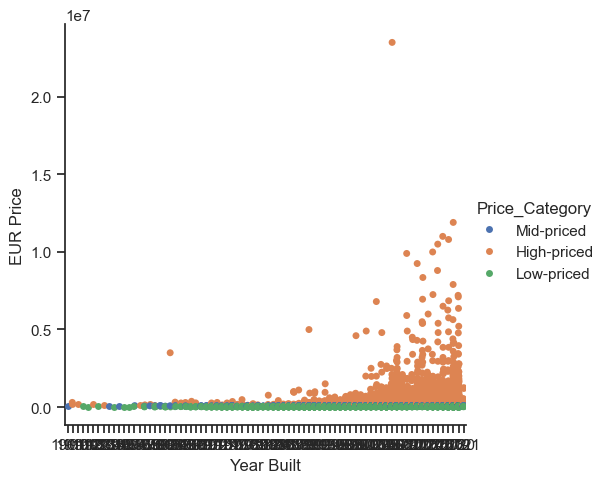

In [43]:
# Create a categorical plot to show the relationship between boat year and price
sns.set(style='ticks')
g2 = sns.catplot(x='Year Built', y='EUR Price', hue='Price_Category',  data=df_boat_data_cleanedup)

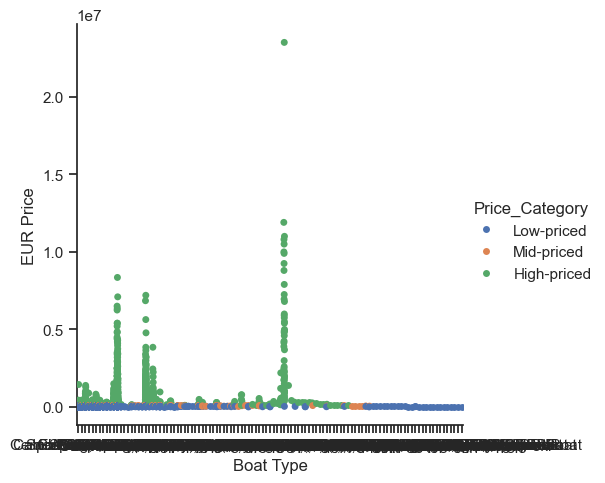

In [45]:
# Create a categorical plot to show the distribution of boat types and prices
sns.set(style='ticks')
g3 = sns.catplot(x='Boat Type', y='EUR Price', hue='Price_Category', data=df_boat_data_cleanedup)

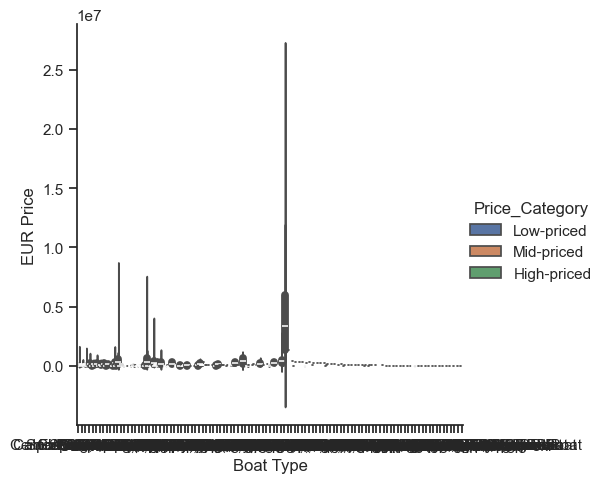

In [47]:
# Create a categorical plot to identify buyer segments based on price and boat type
sns.set(style='ticks')
g4 = sns.catplot(x='Boat Type', y='EUR Price', hue='Price_Category', kind='violin', data=df_boat_data_cleanedup)

In [48]:
#Check the frequency counts for Material
df_boat_data_cleanedup['Material'].value_counts(dropna=False)

Material
GRP              4757
PVC              1073
Steel             409
Wood              151
Aluminium         129
Plastic            72
Carbon Fiber       27
Thermoplastic      13
Hypalon             4
Rubber              1
Name: count, dtype: int64

In [50]:
#Check the frequency counts for Country
df_boat_data_cleanedup['Country1'].value_counts(dropna=False)

Country1
Germany         1209
Italy            918
Switzerland      900
France           870
Spain            508
                ... 
Taiwan             1
Jersey             1
Brandenburg        1
Italien            1
Thun               1
Name: count, Length: 124, dtype: int64

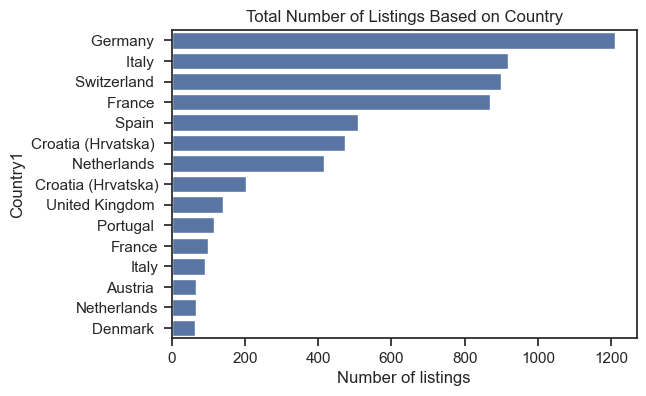

In [52]:
# plot_data based on country
plot_data = df_boat_data_cleanedup['Country1'].value_counts()[:15]

fig, ax = plt.subplots(figsize = (6,4))

sns.barplot(y=plot_data.index, x = plot_data.values, ax=ax)
ax.set(xlabel = 'Number of listings', ylabel = 'Country1', title = 'Total Number of Listings Based on Country')
plt.show()

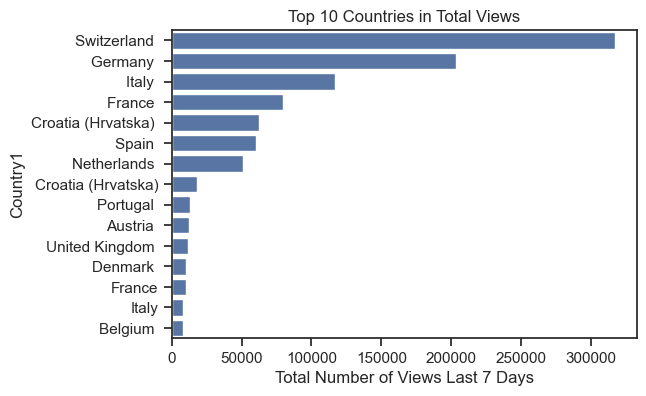

In [53]:
# top10countries_by_views
top10countries_by_views = df_boat_data_cleanedup.groupby('Country1')['Number of views last 7 days'].sum().sort_values(ascending=False)[:15]


plot_data = top10countries_by_views
fig, ax = plt.subplots(figsize = (6,4))
sns.barplot(y=plot_data.index, x = plot_data.values, ax=ax)
ax.set(xlabel = 'Total Number of Views Last 7 Days', ylabel = 'Country1', title = 'Top 10 Countries in Total Views')
plt.show()

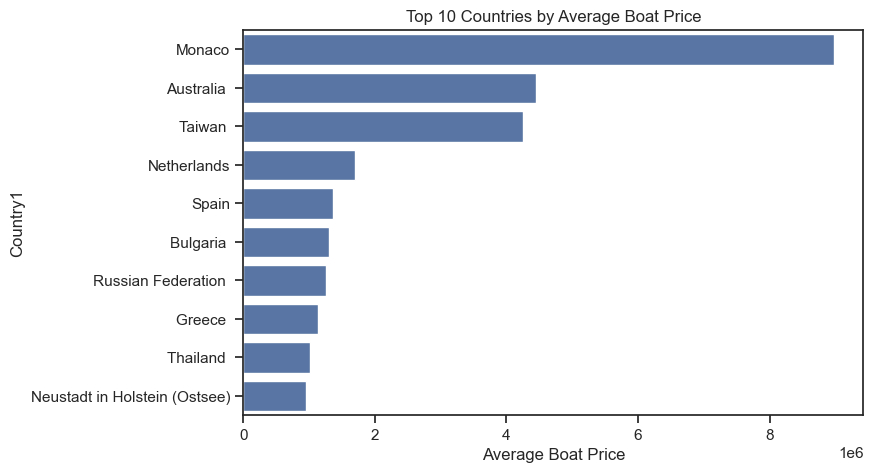

In [55]:
# Average boat prices by country
top_countries_by_price = df_boat_data_cleanedup.groupby('Country1')['EUR Price'].mean().sort_values(ascending=False).head(10)

# Plotting
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(y=top_countries_by_price.index, x=top_countries_by_price.values, ax=ax)
ax.set(xlabel='Average Boat Price', ylabel='Country1', title='Top 10 Countries by Average Boat Price')
plt.show()

In [56]:
#Check the frequency counts for Boat type and MAnufactures
df_boat_data_cleanedup['Boat Type'].value_counts().head(5)

Boat Type
Motor Yacht    1844
Sport Boat      946
Flybridge       895
Pilothouse      447
Cabin Boat      414
Name: count, dtype: int64

In [58]:
df_boat_data_cleanedup['Manufacturer'].value_counts().head(10)

Manufacturer
Bnteau power boats                            528
Jeanneau power boats                          384
Sunseeker power boats                         345
Princess power boats                          185
Sea Ray power boats                           185
Cranchi power boats                           182
Azimut power boats                            172
Quicksilver (Brunswick Marine) power boats    150
Bavaria power boats                           126
Fairline power boats                          126
Name: count, dtype: int64

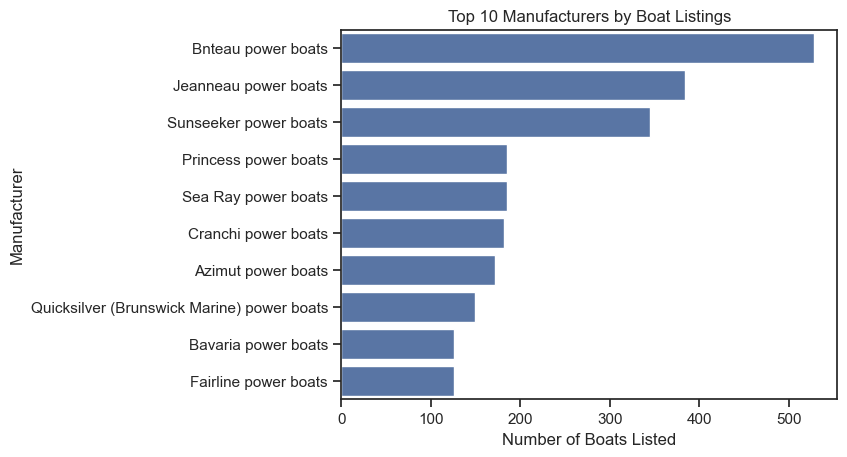

In [59]:
# Top 10 Manufacturers by number of listings 
top_manufacturers = df_boat_data_cleanedup['Manufacturer'].value_counts().head(10)

# Plot
sns.barplot(x=top_manufacturers.values, y=top_manufacturers.index)
plt.title("Top 10 Manufacturers by Boat Listings")
plt.xlabel("Number of Boats Listed")
plt.ylabel("Manufacturer")
plt.show()

### Questions and Answers

#### Which states or cities have the highest average boat prices?
Monaco,Australia,Taiwan and Netherlands have the highest average boat prices.
Germany,Italy,France,Switzerland have the highest number of listings.
Switzerland ,Germany,Italy and France are the top 10 countries in views.
#### Is there a relationship between boat length/year and price?
There is a positive correlation between:
Boat Length and Price: Longer boats tend to be more expensive.
Boat Year and Price: Newer boats generally cost more.
#### Do certain boat types or brands dominate the market?
Motor Yacht,Sport Boat, Flyridge are the boat types that dominate the market.The Manufacturers Bnteau Power Boats,Jeanneau Power Boats and Sunseeker Power Boats dominate the market.
#### Can we identify distinct buyer segments based on features and price points?
Yes. Using features like Boat Type, Boat Length, Year, and Price_Category,we can observe clear segments-
Budget buyers may prefer older, smaller boats from economy brands.
Luxury buyers opt for newer, longer, high-priced boats from premium brands.

### Hypothesis

Higher-priced boats get more views.
Certain boat types (e.g., Motor Yacht, Sport Boat) dominate in number of listings and views.
Older boats get more views than newer boats.

In [61]:
# Export data to pkl
df_boat_data_cleanedup.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_sales_cleaned2.pkl'))

In [62]:
# Export data to csv
df_boat_data_cleanedup.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_sales_cleaned2.csv'))